https://www.kaggle.com/competitions/spaceship-titanic/data
Logically speaking this is almost impossible to predict. Assuming that the crash is instanteneous passenger VIP or whatever information is not relevant to whether they were transported or not. This is because most of the passengers are lurking around various parts of the ship, so if the ship hits the spactime anomoly then a random sample of the passengers (or whoever is in that area) would be "transported". We essentially have no guarentee for what people will be where in the ship, except for the people in Cryosleep. Those people are confined to their cabins so when they ship crashes we know their location. Based on this fact cryosleep and cabin number is the only relevant factor to determine where the crash happened.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/12th Grade/Machine Learning/Data/ST training set.csv")

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df['Idgroup'] = df['PassengerId'].str.split('_').str[0].astype(int)

In [ ]:
df['PassengerId'].str.split('_').str[1].astype(int)

0       1
1       1
2       1
3       2
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    2
Name: PassengerId, Length: 8693, dtype: int64

In [ ]:
df

In [ ]:
df.groupby('HomePlanet').value_counts()

HomePlanet  PassengerId  CryoSleep  Cabin     Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name             Transported
Earth       0002_01      False      F/0/S     TRAPPIST-1e    24.0  False  109.0        9.0        25.0          549.0  44.0    Juanna Vines     True           1
            9279_01      False      G/1500/S  TRAPPIST-1e    26.0  False  0.0          0.0        1872.0        1.0    0.0     Fayey Connon     True           1
            9278_01      True       G/1499/S  PSO J318.5-22  18.0  False  0.0          0.0        0.0           0.0    0.0     Kurta Mondalley  False          1
            9272_02      False      F/1894/P  TRAPPIST-1e    21.0  False  86.0         3.0        149.0         208.0  329.0   Gordo Simson     False          1
            9270_01      True       G/1497/S  55 Cancri e    33.0  False  0.0          0.0        0.0           0.0    0.0     Lan Mckinsond    True           1
                                       

In [ ]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df1 = df.copy

In [ ]:
imputer = SimpleImputer(strategy='mean')
df1 = df1.fillna(imputer.fit_transform(data))


AttributeError: ignored

In [ ]:
#df['Name'].fillna('noname', inplace=True)
#df['Destination'].fillna('unknown', inplace=True)
#df['HomePlanet'].fillna('unknown', inplace=True)
#df['Age'].fillna(df['Age'].median(), inplace=True)
#df['VIP'].fillna(False, inplace=True)
#df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
#df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
#df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
#df['Spa'].fillna(df['Spa'].mean(), inplace=True)
#df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)
#df.dropna(subset = ['CryoSleep', 'Cabin'], inplace=True)

In [ ]:
#from os import defpath
#features_to_impute = ['Age', 'Cabin']

# Create imputers for each feature
#imputers = {}
#for feature in features_to_impute:
#    imputer = SimpleImputer(strategy='mean')
#    imputers[feature] = imputer

# Impute missing values
#for feature in features_to_impute:
#    defpath[feature] = imputers[feature].fit_transform(data[[feature]])

In [ ]:
print("mean roomservice", df['RoomService'].mean(), "mean foodcourt", df['FoodCourt'].mean(), "mean shopping mall", df['ShoppingMall'].mean(), "mean spa", df['Spa'].mean(), "mean vrdeck", df['VRDeck'].mean())


mean roomservice 222.06338636083365 mean foodcourt 457.8914786040203 mean shopping mall 175.60042047984172 mean spa 307.30648741983225 mean vrdeck 306.1683730109782


In [ ]:
t1features = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features = ['CryoSleep', 'Cabin']
newfeatures = ['CryoSleep', 'Cabin', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
X = df[t1features]
y = df["Transported"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7634754625905068
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.64      0.73      1247
        True       0.71      0.88      0.79      1239

    accuracy                           0.76      2486
   macro avg       0.78      0.76      0.76      2486
weighted avg       0.78      0.76      0.76      2486

Confusion Matrix:
[[ 802  445]
 [ 143 1096]]


In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<ipython-input-17-5fd967440757>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features + [target_column]].corr()


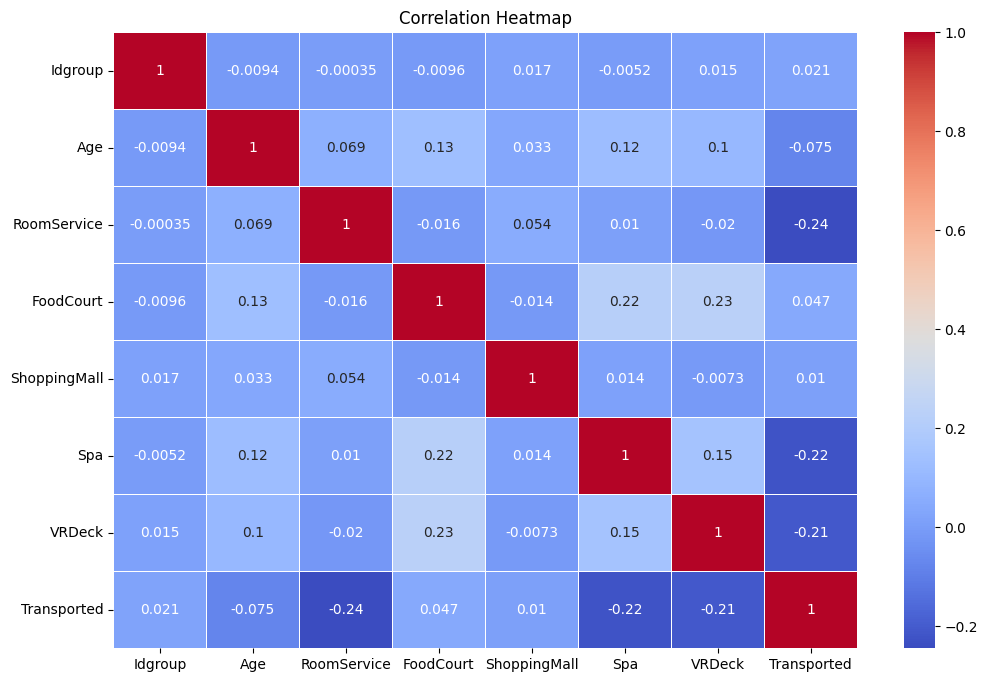

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset


# Assuming "Transported" is the name of your target column
target_column = "Transported"

# Select the features to be included in the correlation analysis
features = ['Idgroup', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Calculate the correlation matrix
correlation_matrix = df[features + [target_column]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


10/30

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
col = [ 'HomePlanet', 'CryoSleep', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       ]

In [ ]:
X = df[col]
y = df['Transported']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
logreg = LogisticRegression()

In [ ]:
imp_home = SimpleImputer(strategy = 'constant', fill_value= 'Mars')

In [ ]:
imp_vip = SimpleImputer(strategy = 'constant', fill_value= False)

In [ ]:
imp_cryosleep = SimpleImputer(strategy = 'constant', fill_value= False)

In [ ]:
imp_age = SimpleImputer(strategy = 'mean')

In [ ]:
imp_money = SimpleImputer(strategy = 'constant', fill_value= 0)

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ct = make_column_transformer((imp_home, 'HomePlanet'),
                             (imp_vip, 'VIP'),
                             (imp_cryosleep, 'CryoSleep'),
                             (imp_age, 'Age'),
                             (imp_money, 'RoomService'),
                             (imp_money, 'FoodCourt'),
                             (imp_money, 'ShoppingMall'),
                             (imp_money, 'Spa'),
                             (imp_money, 'VRDeck'),
                             (ohe, 'HomePlanet'),
                             remainder='passthrough')

In [ ]:
pipe = make_pipeline(ct, logreg)

In [ ]:
pipe.fit(X_train, y_train)

ValueError: ignored

In [ ]:
col = [ 'Idgroup', 'Destination', 'HomePlanet', 'CryoSleep', 'Age', 'VIP', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','RoomService'] # add back room service
X = df[col]
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
imp_home = SimpleImputer(strategy = 'constant', fill_value= 'Mars')
imp_dest = SimpleImputer(strategy = 'constant', fill_value= 'missing')
imp_vip = SimpleImputer(strategy = 'constant', fill_value= False)
imp_cryosleep = SimpleImputer(strategy = 'constant', fill_value= False)
imp_age = SimpleImputer(strategy = 'mean')
imp_money = SimpleImputer(strategy = 'constant', fill_value= 0)
ohe = OneHotEncoder()
ct = make_column_transformer(
      # Specify 'HomePlanet' as a list

    (imp_vip, ['VIP']),
    (ohe, ['Destination']),
    (imp_cryosleep, ['CryoSleep']),
    (imp_age, ['Age']),
    (imp_money, [ 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),  # add back roomservice into the imp_money
    (ohe, ['HomePlanet']),
    remainder='passthrough')
pipe = make_pipeline(ct, StandardScaler(), logreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(fill_value=False,
                                                                strategy='constant'),
                                                  ['VIP']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(),
                                                  ['Destination']),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(fill_value=False,
                                                                strategy='constant'),
                                                  ['CryoSleep']),
                                                 ('simpleimputer-3',
                                                  SimpleImputer(), ['Age']),
                                                 ('simpleimputer-4',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['HomePlanet'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7933282208588958


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Create pipelines for each classifier
logreg_pipe = make_pipeline(ct, StandardScaler(), LogisticRegression())
rf_pipe = make_pipeline(ct, StandardScaler(), RandomForestClassifier())
xgb_pipe = make_pipeline(ct, StandardScaler(), XGBClassifier())
svm_pipe = make_pipeline(ct, StandardScaler(), SVC())

# Fit the models on the training data
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
xgb_pipe.fit(X_train, y_train)
svm_pipe.fit(X_train, y_train)

# Evaluate the models
from sklearn.metrics import accuracy_score

logreg_accuracy = accuracy_score(y_test, logreg_pipe.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_pipe.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_pipe.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_pipe.predict(X_test))

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.7960122699386503
Random Forest Accuracy: 0.7783742331288344
XGBoost Accuracy: 0.7841257668711656
SVM Accuracy: 0.7925613496932515


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Define the list of features
selected_features = ['Idgroup', 'Destination', 'HomePlanet', 'CryoSleep', 'Age', 'VIP', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']

# Create pipelines WITH the feature selection step
logreg_pipe = make_pipeline(ct, StandardScaler(), SelectKBest(f_classif), LogisticRegression())
rf_pipe = make_pipeline(ct, StandardScaler(), SelectKBest(f_classif), RandomForestClassifier())
xgb_pipe = make_pipeline(ct, StandardScaler(), SelectKBest(f_classif), XGBClassifier())
svm_pipe = make_pipeline(ct, StandardScaler(), SelectKBest(f_classif), SVC())

# Define the parameter grids for feature selection
param_grid = {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Adjust the number of features to select
}

# Create GridSearchCV objects
logreg_grid = GridSearchCV(logreg_pipe, param_grid, cv=5, scoring='accuracy')
rf_grid = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='accuracy')
xgb_grid = GridSearchCV(xgb_pipe, param_grid, cv=5, scoring='accuracy')
svm_grid = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='accuracy')

# Fit the grid search models on the training data
logreg_grid.fit(X_train[selected_features], y_train)
rf_grid.fit(X_train[selected_features], y_train)
xgb_grid.fit(X_train[selected_features], y_train)
svm_grid.fit(X_train[selected_features], y_train)

# Get the best parameters for each model
logreg_best_params = logreg_grid.best_params_
rf_best_params = rf_grid.best_params_
xgb_best_params = xgb_grid.best_params_
svm_best_params = svm_grid.best_params_

print("Logistic Regression Best Parameters:", logreg_best_params)
print("Random Forest Best Parameters:", rf_best_params)
print("XGBoost Best Parameters:", xgb_best_params)
print("SVM Best Parameters:", svm_best_params)


Logistic Regression Best Parameters: {'selectkbest__k': 5}
Random Forest Best Parameters: {'selectkbest__k': 8}
XGBoost Best Parameters: {'selectkbest__k': 5}
SVM Best Parameters: {'selectkbest__k': 5}


In [ ]:
def extract_best_features_and_score(grid, feature_names):
    # Get the boolean mask for the selected features from the best estimator
    selected_mask = grid.best_estimator_.named_steps['selectkbest'].get_support()
    # Extract the names of the selected features using the mask
    selected_features = [feature for (feature, is_selected) in zip(feature_names, selected_mask) if is_selected]
    # Get the best score
    best_score = grid.best_score_
    return selected_features, best_score

# Extract and print for each model
logreg_best_features, logreg_best_score = extract_best_features_and_score(logreg_grid, selected_features)
rf_best_features, rf_best_score = extract_best_features_and_score(rf_grid, selected_features)
xgb_best_features, xgb_best_score = extract_best_features_and_score(xgb_grid, selected_features)
svm_best_features, svm_best_score = extract_best_features_and_score(svm_grid, selected_features)

print("Logistic Regression Best Features:", logreg_best_features)
print("Logistic Regression Best Score:", logreg_best_score)
print("\nRandom Forest Best Features:", rf_best_features)
print("Random Forest Best Score:", rf_best_score)
print("\nXGBoost Best Features:", xgb_best_features)
print("XGBoost Best Score:", xgb_best_score)
print("\nSVM Best Features:", svm_best_features)
print("SVM Best Score:", svm_best_score)


Logistic Regression Best Features: ['VIP', 'ShoppingMall', 'RoomService']
Logistic Regression Best Score: 0.7781429745275267

Random Forest Best Features: ['Destination', 'CryoSleep', 'VIP', 'ShoppingMall', 'RoomService']
Random Forest Best Score: 0.7600657354149548

XGBoost Best Features: ['VIP', 'ShoppingMall', 'RoomService']
XGBoost Best Score: 0.7689400164338538

SVM Best Features: ['VIP', 'ShoppingMall', 'RoomService']
SVM Best Score: 0.7801150369761709


In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Idgroup'],
      dtype='object')

New version 11/1


In [ ]:
col = [ 'CryoSleep', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
       ]

In [ ]:
X = df[col]
y= df.dropna()['Transported']


ValueError: ignored

In [ ]:
logreg = LogisticRegression()
imp_home = SimpleImputer(strategy = 'constant', fill_value= 'Mars')
imp_vip = SimpleImputer(strategy = 'constant', fill_value= False)
imp_money = SimpleImputer(strategy = 'constant', fill_value= 0)
imp_age = SimpleImputer(strategy = 'mean')
imp_Trucryosleep = SimpleImputer(strategy = 'constant', fill_value = True)
imp_Falcryosleep = SimpleImputer(strategy = 'constant', fill_value = False)

In [ ]:
#numerical_columns = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
#numerical_sum = numerical_columns.sum(axis=1)

# Function to impute the 'CryoSleep' column
#def impute_cryo_sleep(row):
#    if pd.notna(row['CryoSleep']):
#        return row['CryoSleep']
#    if numerical_sum[row.name] < 50:
#        return False
#    else:
#        return True

# Apply the impute_cryo_sleep function to the 'CryoSleep' column
#df['CryoSleep'] = df.apply(impute_cryo_sleep, axis=1)



In [ ]:
col = [ 'CryoSleep', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
       ]
X = df[col]
y= df.dropna()['Transported']
logreg = LogisticRegression()
imp_home = SimpleImputer(strategy = 'constant', fill_value= 'Mars')
imp_vip = SimpleImputer(strategy = 'constant', fill_value= False)
imp_money = SimpleImputer(strategy = 'constant', fill_value= 0)
imp_age = SimpleImputer(strategy = 'mean')
imp_Trucryosleep = SimpleImputer(strategy = 'constant', fill_value = True)
imp_Falcryosleep = SimpleImputer(strategy = 'constant', fill_value = False)
ohe = OneHotEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ct = make_column_transformer(
      # Specify 'HomePlanet' as a list

    (imp_vip, ['VIP']),
    (ohe, ['Destination']),

    (imp_age, ['Age']),
    (imp_money, [ 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),  # add back roomservice into the imp_money
    (imp_home, ['HomePlanet']),
    remainder='passthrough')
pipe = make_pipeline(ct, StandardScaler(), logreg)
pipe.fit(X_train, y_train)

ValueError: ignored

In [ ]:
col = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = df.dropna()[col]
y = df.dropna()['Transported']
logreg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7926337033299697


11/3
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________


In [ ]:
y_pred = pipe.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

NotFittedError: ignored

In [ ]:
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7825428859737639


with dropna: 78.254%


Stuff above is good
______________________________________________________________________________________________________________

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Idgroup           0
dtype: int64

In [ ]:
df.loc[df['Cabin'].isna(), 'Idgroup']

15        12
93       101
103      110
222      239
227      244
        ... 
8209    8772
8475    9057
8485    9069
8509    9081
8656    9233
Name: Idgroup, Length: 199, dtype: int64

In [ ]:
df.loc[df['Idgroup'].isin(df.loc[df['Cabin'].isna(), 'Idgroup'])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Idgroup
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,12
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,101
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,110
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,110
105,0110_03,Europa,False,B/5/P,TRAPPIST-1e,42.0,False,2209.0,11418.0,0.0,1868.0,445.0,Alaratz Aloubtled,True,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,9081_05,Earth,False,F/1858/P,TRAPPIST-1e,48.0,False,0.0,586.0,784.0,4.0,21.0,Haryn Clemondsey,True,9081
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False,9081
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081


In [ ]:
df['Destination'].unique().

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
df['Cabin'].fillna('')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Idgroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [ ]:
logreg_accuracy = accuracy_score(y_test, logreg_pipe.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_pipe.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_pipe.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_pipe.predict(X_test))

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("SVM Accuracy:", svm_accuracy)

NotFittedError: ignored

In [ ]:
# Get the boolean mask for the selected features from the best estimator of svm_grid
selected_mask = svm_grid.best_estimator_.named_steps['selectkbest'].get_support()

# Extract the names of the selected features using the mask
selected_svm_features = [feature for (feature, is_selected) in zip(selected_features, selected_mask) if is_selected]

print("Selected features for SVM:", selected_svm_features)

Selected features for SVM: ['CryoSleep', 'VIP', 'Spa', 'VRDeck', 'RoomService']


In [ ]:
col = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = df[col]
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
imp_home = SimpleImputer(strategy='constant', fill_value='Mars')
imp_vip = SimpleImputer(strategy='constant', fill_value=False)
imp_cryosleep = SimpleImputer(strategy='constant', fill_value=False)
imp_age = SimpleImputer(strategy='mean')
imp_money = SimpleImputer(strategy='constant', fill_value=0)
ohe = OneHotEncoder()
ct = make_column_transformer(
    (imp_home, ['HomePlanet']),
    (imp_vip, ['VIP']),
    (imp_cryosleep, ['CryoSleep']),
    (imp_age, ['Age']),
    (imp_money, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
    (ohe, ['HomePlanet']),
    remainder='passthrough'
)
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train, y_train)


ValueError: ignored

kaggle test

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/test_spacetitanic.csv')

In [ ]:
df_new.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [ ]:
df_new['Name'].fillna('noname', inplace=True)
df_new['Destination'].fillna('unknown', inplace=True)
df_new['HomePlanet'].fillna('unknown', inplace=True)
df_new['Age'].fillna(df['Age'].mean(), inplace=True)
df_new['VIP'].fillna(False, inplace=True)
df_new['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df_new['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df_new['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df_new['Spa'].fillna(df['Spa'].median(), inplace=True)
df_new['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Calculate the sum of numerical columns for each row
df_new['SumNumerical'] = df[numerical_cols].sum(axis=1)
# Replace missing values in 'CryoSleep' based on the sum
df_new['CryoSleep'] = df_new.apply(lambda row: False if row['SumNumerical'] > 50 else True if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)
# Drop the temporary 'SumNumerical' column
df_new = df_new.drop('SumNumerical', axis=1)
df_new['Cabin'].fillna('missing', inplace=True)

AttributeError: ignored

In [ ]:
col = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = df.dropna()[col]
y = df.dropna()['Transported']
logreg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)
logreg.fit(X_train, y_train)



# Extract the relevant features for prediction
# Assuming you've defined 'col' as the list of features in your previous code
X_new_test = df_new.dropna()[col]


# Use the model to make predictions on the test data
y_new_pred = logreg.predict(X_new_test)

# Create a DataFrame to store the results in the required format
results = pd.DataFrame({
    'PassengerId': df_new['PassengerId'],
    'Transported': y_new_pred  # Assuming 'Transported' is your predicted target variable
})

# Save the results as a CSV file
downloads_path = r'/content/drive/MyDrive/12th Grade/Machine Learning/Data/ submission.csv'

# Save the 'submission.csv' file to the Downloads directory
results.to_csv(downloads_path, index=False)



In [ ]:
import os
os.getcwd()


'/content'